In [1]:
import pandas as pd

In [2]:
cols = ['Date', 'Destination']
parser = lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce')
searches_df = pd.read_csv('./searches.csv', sep='^', usecols=cols, parse_dates=['Date'], date_parser=parser)

In [3]:
searches_df.describe()

,Date,Destination
count,20390165,20390165
unique,359,3068
top,2013-01-01 00:00:00,BKK
freq,57297,477093
first,2013-01-01 00:00:00,NaN
last,2013-12-25 00:00:00,NaN


In [4]:
# Consider 2 airports for Madrid: MAD and TOJ
searches_df.loc[searches_df.Destination == 'TOJ', 'Destination'] = 'MAD'
searches_filtered = searches_df[searches_df.Date.notnull() & searches_df.Destination.notnull() & ((searches_df.Destination == 'MAD') | (searches_df.Destination == 'BCN') | (searches_df.Destination == 'AGP'))]

In [5]:
searches_grouped = searches_filtered.set_index('Date').groupby([pd.TimeGrouper('M'), 'Destination'])['Destination'].count()
searches_grouped

Date        Destination
2013-01-31  AGP             9633
            BCN            29469
            MAD            24258
2013-02-28  AGP             8379
            BCN            28329
            MAD            22800
2013-03-31  AGP            10659
            BCN            30552
            MAD            24681
2013-04-30  AGP             8265
            BCN            31236
            MAD            25251
2013-05-31  AGP            10830
            BCN            28728
            MAD            26334
2013-06-30  AGP             7923
            BCN            26505
            MAD            22800
2013-07-31  AGP             8892
            BCN            29241
            MAD            22971
2013-08-31  AGP             7866
            BCN            27075
            MAD            21888
2013-09-30  AGP             8151
            BCN            23427
            MAD            21204
2013-10-31  AGP             6499
            BCN            20276
            MAD    

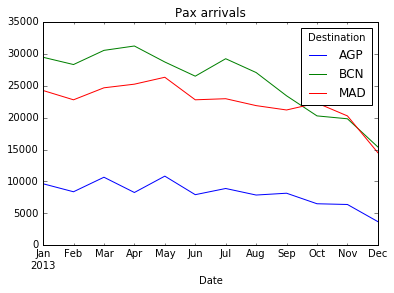

In [7]:
%matplotlib inline
plot_obj = searches_grouped.unstack().plot(title='Pax arrivals')